In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import ast
from mpl_toolkits import mplot3d
import math
import timeit
%matplotlib widget

In [2]:
score_test_dict = {1:"Singles",
                   2:"Pair",
                   3:"Two Pair",
                   4:"Three of a Kind",
                   5:"Straight",
                   6:"Flush",
                   7:"Fullhouse",
                   8:"Four of a Kind"}

In [3]:
card_label_dict = {1:["High Card","2nd Highest","3rd Highest","4th Highest","Non-Flush"],
                  2:["Pair","High Card","2nd Highest","Lowest","Pair-Non-Flush"],
                  3:["Pair1","Pair1","Pair2","Pair2","High Card"],
                  4:["Three","Three","Three","High Card","Lowest"],
                  5:["Straight Highest","2nd Highest","3rd Highest","4th Highest","Non-Flush"],
                  6:["High Card","2nd Highest","3rd Highest","4th Highest","Lowest"],
                  7:["House Triple","House Triple","House Triple","House Pair","House Pair"],
                  8:["Four","Four","Four","Four","High Card"]}

In [4]:
hand_scores = [1,2,3,4,5,7,8] #Ignores flush, straight flush, royal flush

redraw_combs={} #index replacement list, comb list index for ease of use
redraw_combs_rev = {}
count = 0
for i in range(6):
    test = list(itertools.combinations([0,1,2,3,4],i))
    for j,val in enumerate(test):
        redraw_combs[val] = count
        redraw_combs_rev[count] = val
        count += 1

# Begin File Break

In [5]:
plt.close('all')
df = pd.read_csv("Flush Data.csv")
hands = pd.unique(df["Hand List"])

In [6]:
uniques = pd.unique(df["Hand List"]) #Get the unique hand entries
redraw_index = []
for row in range(len(df.index)):
    redraw_index.append(redraw_combs[tuple(ast.literal_eval(df["Index Remove"][row]))]) #Convert removal list into removal index and add in
df["Redraw Index"] = redraw_index
#Some entries note a hand score of 6, so a flush which was randomly occurring because of giving a valued hand to pull quick data and it sometimes not giving the correct 
#They all happen to be hand scores of 1 so replace all 6 with 1
df = df.replace({'Hand Score': {6: 1}})

In [7]:
#Making df of only best redrawing per hand
'''
max_data = []
for ind,hand in enumerate(uniques):
    a = df[df["Hand List"] == hand].iloc[0]
    max_data.append(list(a))
'''
df_max = pd.DataFrame(columns =["Hand List","Hand Score","Index Kept","Index Remove","Winrate","Std","Redraw Index"],data = [list(df[df["Hand List"] == hand].iloc[0]) for ind,hand in enumerate(uniques)])

In [8]:
for hand_score in range(1,9):
    if hand_score != 6:
        print("")
        print("Best Techniques for {0}".format(score_test_dict[hand_score]))
        print("")
    card_types = card_label_dict[hand_score]
    for redraw_index in pd.unique(df_max[df_max["Hand Score"] == hand_score]["Redraw Index"]):
        print("    Redraw Technique {0}.".format(redraw_index))
        if redraw_combs_rev[redraw_index] == ():
            print("         Keeping entire hand.")
        for index in redraw_combs_rev[redraw_index]:
            #These are the specific hand card indices selected for removal by best redrawing technique
            print("         Removing {0} from hand.".format(card_types[index]))


Best Techniques for Singles

    Redraw Technique 31.
         Removing High Card from hand.
         Removing 2nd Highest from hand.
         Removing 3rd Highest from hand.
         Removing 4th Highest from hand.
         Removing Non-Flush from hand.
    Redraw Technique 30.
         Removing 2nd Highest from hand.
         Removing 3rd Highest from hand.
         Removing 4th Highest from hand.
         Removing Non-Flush from hand.
    Redraw Technique 26.
         Removing High Card from hand.
         Removing 2nd Highest from hand.
         Removing 3rd Highest from hand.
         Removing 4th Highest from hand.
    Redraw Technique 22.
         Removing 2nd Highest from hand.
         Removing 3rd Highest from hand.
         Removing 4th Highest from hand.
    Redraw Technique 25.
         Removing 3rd Highest from hand.
         Removing 4th Highest from hand.
         Removing Non-Flush from hand.
    Redraw Technique 15.
         Removing 4th Highest from hand.
         R

# Overall plots

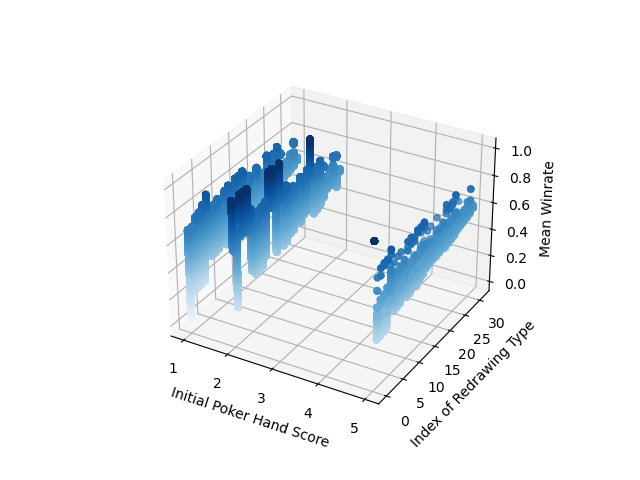

In [9]:
#%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df["Hand Score"],df["Redraw Index"],df["Winrate"], c=df["Winrate"],cmap='Blues')
ax.set_xlabel('Initial Poker Hand Score')
ax.set_ylabel('Index of Redrawing Type')
ax.set_zlabel('Mean Winrate');

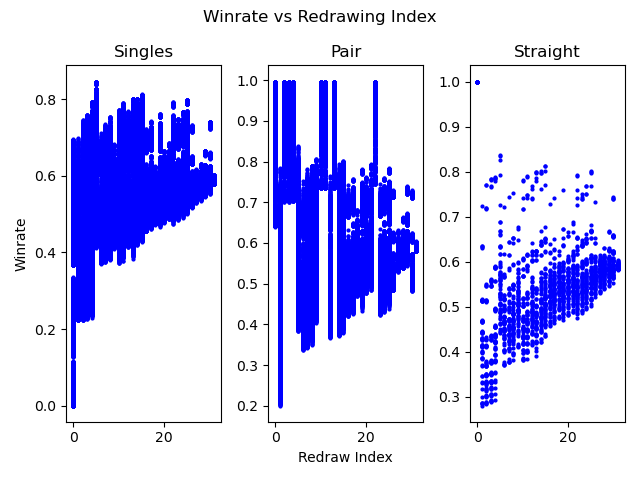

In [10]:
fig, axs = plt.subplots(1,3)
df_select = df[df["Hand Score"] == 1]
axs[0].plot(df_select["Redraw Index"],df_select["Winrate"],'bo',markersize=2)
df_select = df[df["Hand Score"] == 2]
axs[1].plot(df_select["Redraw Index"],df_select["Winrate"],'bo',markersize=2)
df_select = df[df["Hand Score"] == 5]
axs[2].plot(df_select["Redraw Index"],df_select["Winrate"],'bo',markersize=2)
axs[0].set_ylabel("Winrate")
axs[1].set_xlabel('Redraw Index')
axs[0].set_title(score_test_dict[1])
axs[1].set_title(score_test_dict[2])
axs[2].set_title(score_test_dict[5])

fig.suptitle("Winrate vs Redrawing Index")
fig.tight_layout();

# Plotting only the choices leading to maximum winrates

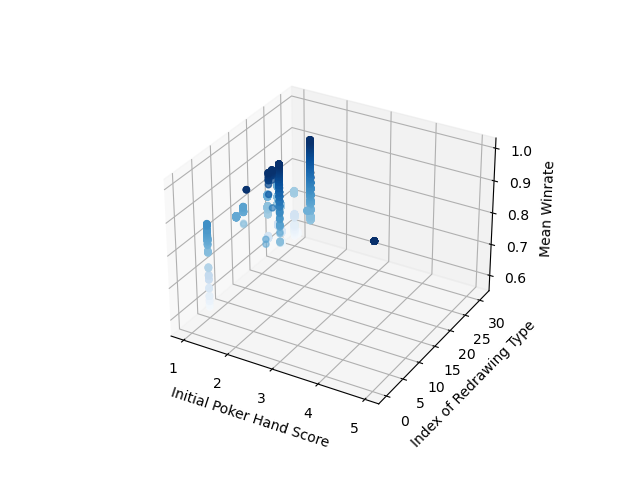

In [11]:
#%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_max["Hand Score"],df_max["Redraw Index"],df_max["Winrate"], c=df_max["Winrate"],cmap='Blues')
ax.set_xlabel('Initial Poker Hand Score')
ax.set_ylabel('Index of Redrawing Type')
ax.set_zlabel('Mean Winrate');

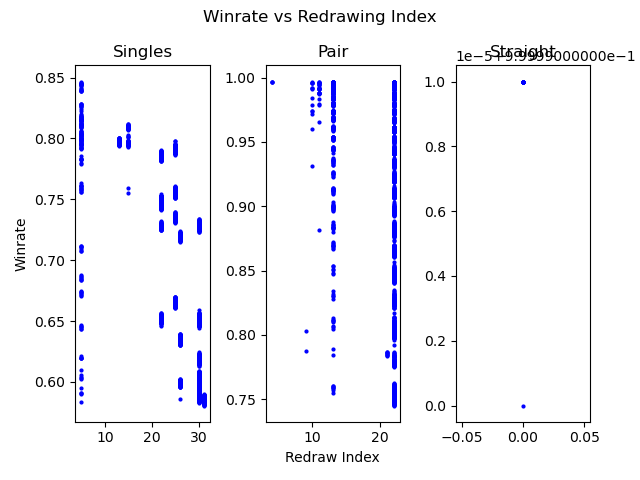

In [12]:
fig, axs = plt.subplots(1,3)
df_select_max = df_max[df_max["Hand Score"] == 1]
axs[0].plot(df_select_max["Redraw Index"],df_select_max["Winrate"],'bo',markersize=2)
df_select_max = df_max[df_max["Hand Score"] == 2]
axs[1].plot(df_select_max["Redraw Index"],df_select_max["Winrate"],'bo',markersize=2)
df_select_max = df_max[df_max["Hand Score"] == 5]
axs[2].plot(df_select_max["Redraw Index"],df_select_max["Winrate"],'bo',markersize=2)
axs[0].set_ylabel("Winrate")
axs[1].set_xlabel('Redraw Index')
axs[0].set_title(score_test_dict[1])
axs[1].set_title(score_test_dict[2])
axs[2].set_title(score_test_dict[5])

fig.suptitle("Winrate vs Redrawing Index")
fig.tight_layout();

# Look for redraw type 5 where we removed only the last card (card preventing a flush)
# Apparently never worth it for pairs, but can be for singles/straights

In [13]:
singles = df_max[df_max["Hand Score"] == 1]
hand_card_values = [[],[],[],[],[]]
for i in range(len(singles)):
    cards = ast.literal_eval(singles["Hand List"].iloc[i])
    for j in range(5):
        hand_card_values[j].append(cards[j])

for i in range(5):
    s = "Card "+str(i+1)
    singles[s] = hand_card_values[i]
print(pd.unique(singles["Redraw Index"]))

[31 30 26 22 25 15 13  5]


C:\Users\diamo\AppData\Local\Temp\ipykernel_19056\3556589019.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  singles[s] = hand_card_values[i]
C:\Users\diamo\AppData\Local\Temp\ipykernel_19056\3556589019.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  singles[s] = hand_card_values[i]
C:\Users\diamo\AppData\Local\Temp\ipykernel_19056\3556589019.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

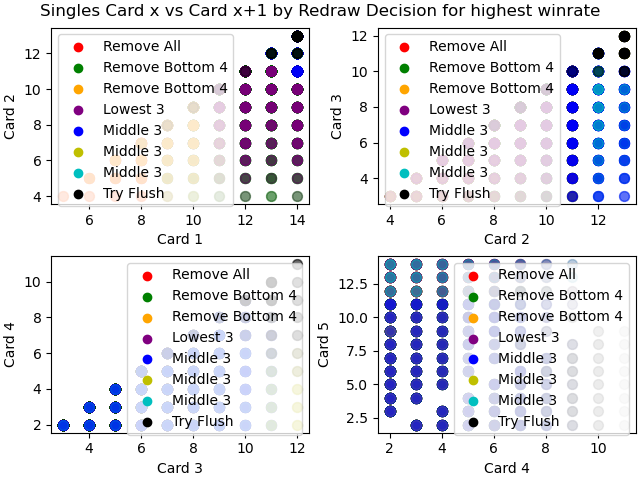

In [14]:
fig,ax = plt.subplots(2,2,constrained_layout=True)
colors = ['r','green','orange','purple','b','y','c','k']
for i in range(2):
    for j in range(2):
        cardnum = j+i*2 + 1
        for ind,redraw in enumerate(pd.unique(singles["Redraw Index"])):
            ax[i,j].scatter(singles["Card "+str(cardnum)][singles["Redraw Index"]==redraw],singles["Card "+str(cardnum + 1)][singles["Redraw Index"]==redraw],s=50,alpha=0.1,color=colors[ind])
            if redraw == 31:
                lab = 'Remove All'
            elif redraw == 30:
                lab = "Remove Bottom 4"
            elif redraw == 5:
                lab = "Try Flush"
            elif redraw == 22:
                lab = "Lowest 3"
            elif redraw == 25:
                lab = "Middle 3"
            ax[i,j].scatter([],[],color=colors[ind],label=lab)
        ax[i,j].legend()
        #ax[i,j].set_title("Singles: Highest vs 2nd Highest Card by Best Redraw Decision")
        ax[i,j].set_xlabel("Card "+str(cardnum))
        ax[i,j].set_ylabel("Card "+str(cardnum+1))
fig.suptitle("Singles Card x vs Card x+1 by Redraw Decision for highest winrate");

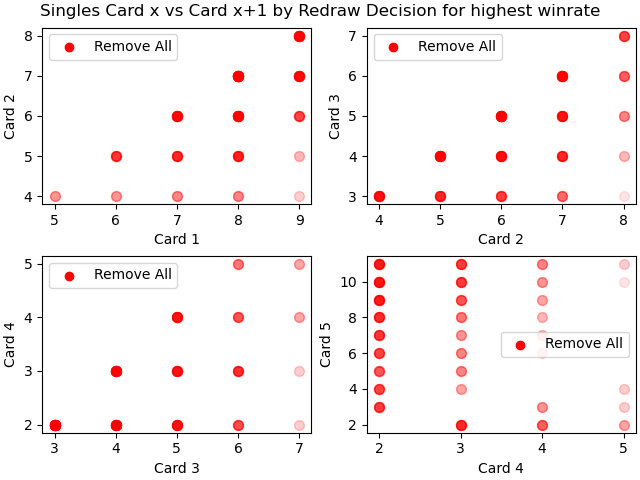

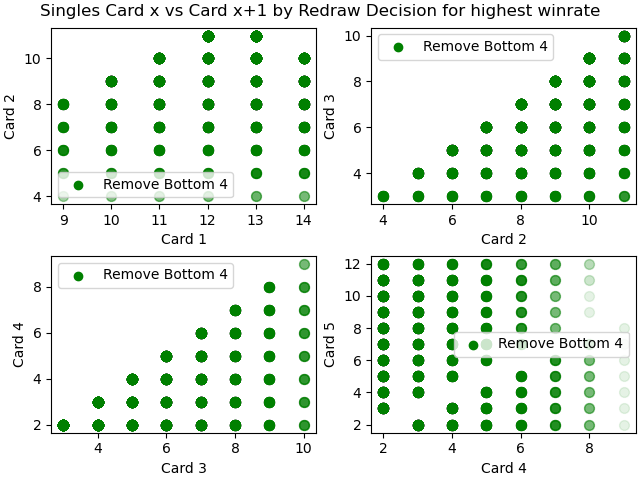

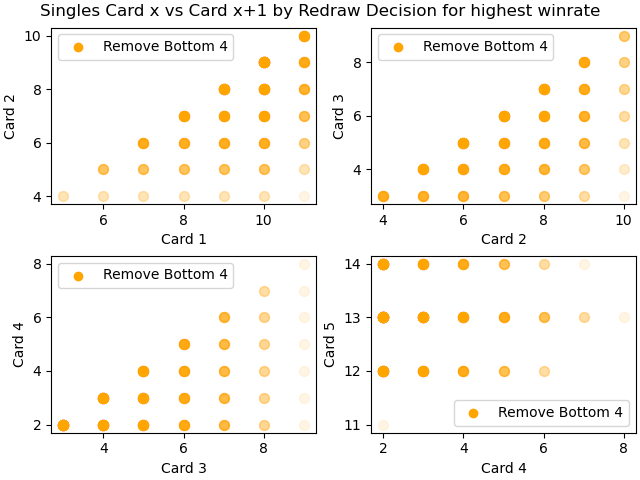

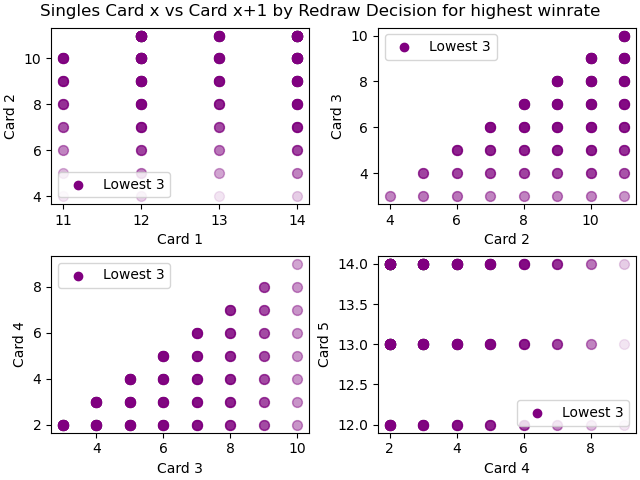

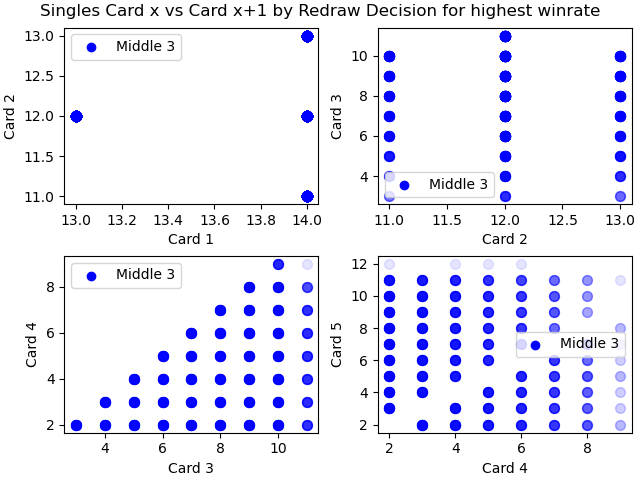

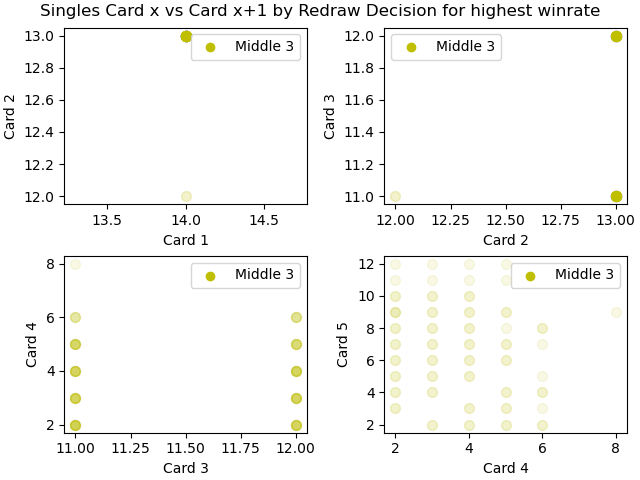

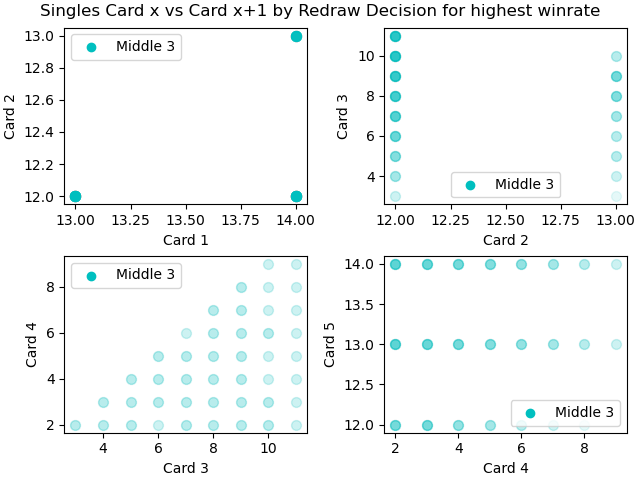

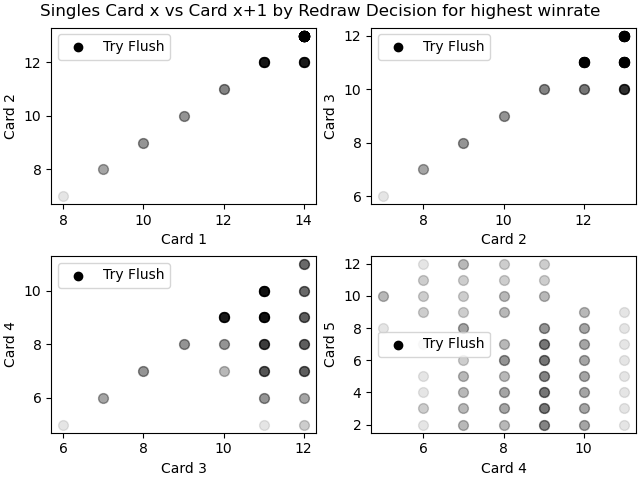

In [15]:
colors = ['r','green','orange','purple','b','y','c','k']
for ind,redraw in enumerate(pd.unique(singles["Redraw Index"])):
    fig,ax = plt.subplots(2,2,constrained_layout=True)
    for i in range(2):
        for j in range(2):
            cardnum = j+i*2 + 1
            ax[i,j].scatter(singles["Card "+str(cardnum)][singles["Redraw Index"]==redraw],singles["Card "+str(cardnum + 1)][singles["Redraw Index"]==redraw],s=50,alpha=0.1,color=colors[ind])
            
            if redraw == 31:
                lab = 'Remove All'
            elif redraw == 30:
                lab = "Remove Bottom 4"
            elif redraw == 5:
                lab = "Try Flush"
            elif redraw == 22:
                lab = "Lowest 3"
            elif redraw == 25:
                lab = "Middle 3"
                
            ax[i,j].scatter([],[],color=colors[ind],label=lab)
            ax[i,j].legend()
            #ax[i,j].set_title("Singles: Highest vs 2nd Highest Card by Best Redraw Decision")
            ax[i,j].set_xlabel("Card "+str(cardnum))
            ax[i,j].set_ylabel("Card "+str(cardnum+1))
    fig.suptitle("Singles Card x vs Card x+1 by Redraw Decision for highest winrate");

# Checking 3D graph distribution for singles/straights with redraw type 5

C:\Users\diamo\AppData\Local\Temp\ipykernel_19056\3400156668.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_singles["Card " + str(i+1)] = col_vals
C:\Users\diamo\AppData\Local\Temp\ipykernel_19056\3400156668.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_singles["Card " + str(i+1)] = col_vals
C:\Users\diamo\AppData\Local\Temp\ipykernel_19056\3400156668.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

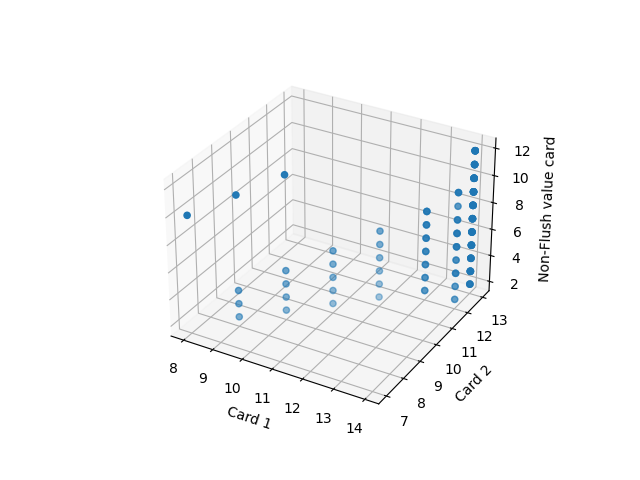

In [16]:
#%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
df_max_singles = df_max[df_max["Hand Score"] == 1]
for i in range(5):
    col_vals = []
    for row in range(len(df_max_singles)):
        hand =  ast.literal_eval(df_max_singles["Hand List"].iloc[row])
        col_vals.append(hand[i])
    df_max_singles["Card " + str(i+1)] = col_vals
ax.scatter3D(df_max_singles[df_max_singles["Redraw Index"] == 5]["Card 1"],df_max_singles[df_max_singles["Redraw Index"] == 5]["Card 2"],df_max_singles[df_max_singles["Redraw Index"] == 5]["Card 5"],cmap='Blues')
ax.set_xlabel('Card 1')
ax.set_ylabel('Card 2')
ax.set_zlabel('Non-Flush value card');

# Accounting for confidence of values and only accepting high confidence conclusions:

In [17]:
df_singles = df[df["Hand Score"] == 1]
mask = []
for i in range(len(df_singles)):
    
    if i == 0:
        curr_hand = ast.literal_eval(df_singles["Hand List"].iloc[i])
        winrates = (df_singles["Winrate"].iloc[i],df_singles["Winrate"].iloc[i+1])
        stds = (df_singles["Std"].iloc[i],df_singles["Std"].iloc[i+1])
        if winrates[1] + stds[1]*1.96/2.576 >= winrates[0] - stds[0]*1.96/2.576: #Changing standard deviation to 95% confidence interval rather than 99%
            #Then the 2nd best choice winrate confidence interval collides with best choice winrate confidence interval
            #We can't be certain which is really the best
            mask.append(False)
        else:
            mask.append(True) #Keeps top choice only

    elif ast.literal_eval(df_singles["Hand List"].iloc[i]) != curr_hand:
        #We moved on to another hand, check top two
        curr_hand = ast.literal_eval(df_singles["Hand List"].iloc[i])
        winrates = (df_singles["Winrate"].iloc[i],df_singles["Winrate"].iloc[i+1])
        stds = (df_singles["Std"].iloc[i],df_singles["Std"].iloc[i+1])
        if winrates[1] + stds[1]*1.96/2.576 >= winrates[0] - stds[0]*1.96/2.576: #Changing standard deviation to 95% confidence interval rather than 99%
            #Then the 2nd best choice winrate confidence interval collides with best choice winrate confidence interval
            #We can't be certain which is really the best
            mask.append(False)
        else:
            mask.append(True) #Keeps top choice only
    else:
        #not the first one in set of hand index variations, so just mask remove rest
        mask.append(False)
    
conf_singles_max = df_singles[mask]

C:\Users\diamo\AppData\Local\Temp\ipykernel_19056\531814446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conf_singles_max["Card " + str(i+1)] = col_vals
C:\Users\diamo\AppData\Local\Temp\ipykernel_19056\531814446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conf_singles_max["Card " + str(i+1)] = col_vals
C:\Users\diamo\AppData\Local\Temp\ipykernel_19056\531814446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

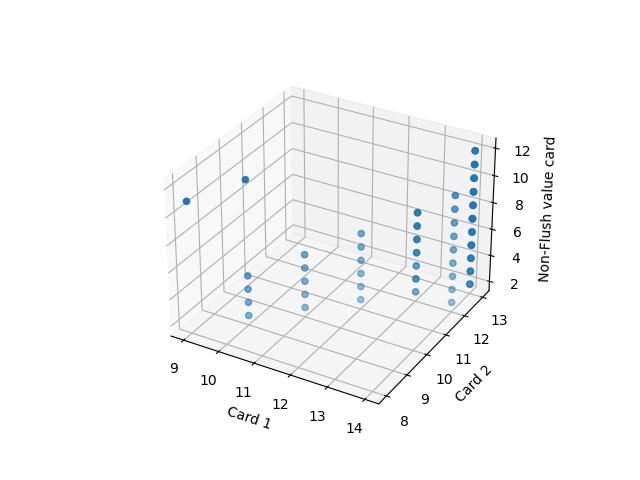

In [18]:
#%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(5):
    col_vals = []
    for row in range(len(conf_singles_max)):
        hand =  ast.literal_eval(conf_singles_max["Hand List"].iloc[row])
        col_vals.append(hand[i])
    conf_singles_max["Card " + str(i+1)] = col_vals
ax.scatter3D(conf_singles_max[conf_singles_max["Redraw Index"] == 5]["Card 1"],conf_singles_max[conf_singles_max["Redraw Index"] == 5]["Card 2"],conf_singles_max[conf_singles_max["Redraw Index"] == 5]["Card 5"],cmap='Blues')
ax.set_xlabel('Card 1')
ax.set_ylabel('Card 2')
ax.set_zlabel('Non-Flush value card');

In [19]:
pd.set_option('display.max_rows', 100)
conf_singles_max[conf_singles_max["Redraw Index"] == 5]

,Hand List,Hand Score,Index Kept,Index Remove,Winrate,Std,Redraw Index,Card 1,Card 2,Card 3,Card 4,Card 5
105440,"[10, 9, 8, 7, 2]",1,"[0, 1, 2, 3]",[4],0.60266,0.003986,5,10,9,8,7,2
112832,"[11, 10, 9, 8, 2]",1,"[0, 1, 2, 3]",[4],0.62118,0.003952,5,11,10,9,8,2
117280,"[12, 11, 10, 9, 2]",1,"[0, 1, 2, 3]",[4],0.64621,0.003895,5,12,11,10,9,2
118464,"[13, 12, 11, 9, 2]",1,"[0, 1, 2, 3]",[4],0.68755,0.003776,5,13,12,11,9,2
118816,"[14, 13, 11, 9, 2]",1,"[0, 1, 2, 3]",[4],0.80411,0.003233,5,14,13,11,9,2
119104,"[14, 13, 12, 9, 2]",1,"[0, 1, 2, 3]",[4],0.81755,0.003146,5,14,13,12,9,2
119680,"[13, 12, 11, 10, 2]",1,"[0, 1, 2, 3]",[4],0.70730,0.003706,5,13,12,11,10,2
119840,"[14, 12, 11, 10, 2]",1,"[0, 1, 2, 3]",[4],0.78340,0.003356,5,14,12,11,10,2
120032,"[14, 13, 11, 10, 2]",1,"[0, 1, 2, 3]",[4],0.82434,0.003100,5,14,13,11,10,2
120320,"[14, 13, 12, 10, 2]",1,"[0, 1, 2, 3]",[4],0.83985,0.002988,5,14,13,12,10,2


# Most of these appear 1 off a straight when removing the bad suit card
# Obvious why attempting straight and flush can be good, but why those not possible to get a straight?

In [20]:
def nearStraightChecker(hand):
    consec_count = 0
    nearconsec_count = 0
    for i in range(len(hand)-1):
        if hand[i] - hand[i+1] == 1:
            consec_count += 1
        elif hand[i] - hand[i+1] == 2:
            nearconsec_count += 1
            straighten = hand[i] - 1
    if consec_count == 2 and nearconsec_count == 1 or consec_count == 3 and nearconsec_count == 0:
        if consec_count == 3:
            straighten = (hand[0] + 1, hand[-1] - 1)
        #print("Possible to straighten with",straighten)
        return 1
    else:
        #print("Impossible to straighten")
        return 0

In [21]:
mask = []
for hand in conf_singles_max[conf_singles_max["Redraw Index"] == 5]["Hand List"]:
    hand = ast.literal_eval(hand)
    hand = hand[:-1]
    if nearStraightChecker(hand):
        mask.append(False)
    else:
        mask.append(True)

In [22]:
conf_singles_not_straightened = conf_singles_max[conf_singles_max["Redraw Index"] == 5][mask]

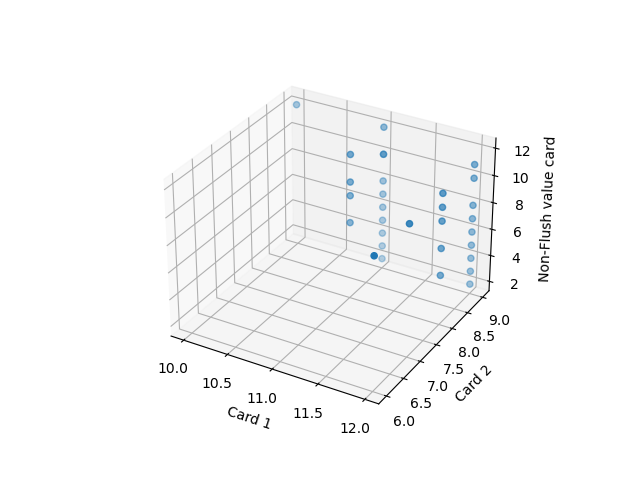

In [23]:
#%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(conf_singles_not_straightened[conf_singles_not_straightened["Redraw Index"] == 5]["Card 3"],conf_singles_not_straightened[conf_singles_not_straightened["Redraw Index"] == 5]["Card 4"],conf_singles_not_straightened[conf_singles_not_straightened["Redraw Index"] == 5]["Card 5"],cmap='Blues')
ax.set_xlabel('Card 1')
ax.set_ylabel('Card 2')
ax.set_zlabel('Non-Flush value card');

In [24]:
# Always 14,13 then either 12/11, 8/9, and finally 12-5 for 8 and any for 9
#So in essence only if you have a good suited 14 and 13 and other cards are relatively high without straight potential
#I think this is akin to good redrawing for unsuited types trying for a high pair

# Results

In [25]:
#If suited cards are near a straight where the current lowest card is at worst a 6, try to redraw for a flush/straight and pair potential
#If suited 14,13 and very high 3rd/4th cards (8-9, 11-12) then you can also redraw unsuited for pair/flush potential